### Import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Show The Data

In [3]:
data = pd.read_csv("D:/PYTHON 2/top-1000-trending-youtube-videos.csv")
data.head()

,rank,Video,Video views,Likes,Dislikes,Category,published
0,1,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237","19,023",859,NaN,2017
1,2,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677","3,497,955","78,799",Music,2019
2,3,JoJo Siwa - Karma (Official Video),"34,206,747","293,563",NaN,Music,2024
3,4,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918","44,861,602",NaN,Music,2015
4,5,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971",38,NaN,NaN,2021


In [4]:
data.columns

Index(['rank', 'Video', 'Video views', 'Likes', 'Dislikes', 'Category',
       'published'],
      dtype='object')

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   rank         1000 non-null   int64 
 1   Video        1000 non-null   object
 2   Video views  1000 non-null   object
 3   Likes        973 non-null    object
 4   Dislikes     687 non-null    object
 5   Category     820 non-null    object
 6   published    1000 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 54.8+ KB


In [8]:
data.size

7000

In [9]:
data.dtypes

rank            int64
Video          object
Video views    object
Likes          object
Dislikes       object
Category       object
published       int64
dtype: object

### 1) Rank Title Or Description Of The Vedio.

In [ ]:
rank = data[['Video views', 'Video']]
rank['Video views'].nunique()
rank['Video views'].min()
rank['Video views'].max()
rank['Video views'].str.title()
rank

### 2) Video Title Or Description Of The Video.

In [11]:
video = data['Video']
video.head()
total_videos = video.shape[0]
unique_videos = video.nunique()
f"\nTotal videos: {total_videos}"
f"Unique video titles: {unique_videos}"
"\nTop 5 Most Common Video Titles:"
video.value_counts().head()
video_title_capitalized = video.str.title()
video_title_capitalized = video.head()
video

0      20 Tennis shots if they were not filmed, NOBOD...
1      Lil Nas X - Old Town Road (Official Movie) ft....
2                     JoJo Siwa - Karma (Official Video)
3      Wiz Khalifa - See You Again ft. Charlie Puth [...
4                           伊賀の天然水強炭酸水「家族で、シュワシェア。」篇　15秒
                             ...                        
995    CALIFORNIA - MONDAY JUSTICE FEAT. SNOOP DOGG (...
996    John McEnroe's most famous outburst happened i...
997                           Adi Golan's Group - Teaser
998                     Keg tapping goes horribly wrong.
999    LIVE Hurricane Irma - Downtown Orlando - Ameri...
Name: Video, Length: 1000, dtype: object

### 3) Video views, Likes, Dislikes: These Are Currently Stored As Strings With Commas, So Need To Be Converted To Numeric.

In [17]:
cleaned = data[['Video views', 'Likes', 'Dislikes']].copy()
for col in cleaned.columns:
    cleaned[col] = cleaned[col].astype(str).str.replace(',', '', regex=False)
    cleaned[col] = pd.to_numeric(cleaned[col], errors='coerce')
"Missing values after cleaning:"
cleaned.isna().sum()
cleaned = cleaned.dropna()
"\nCleaned data (first 5 rows):"
cleaned.head()

,Video views,Likes,Dislikes
0,3471237,19023.0,859.0
1,54071677,3497955.0,78799.0
5,76834495,804353.0,21195.0
7,96686,1007.0,82.0
9,8353318,5613.0,1082.0


### 4) Published: Year The Video Was Published.

In [20]:
published = data[['published', 'Video', 'Video views',]]
published

,published,Video,Video views
0,2017,"20 Tennis shots if they were not filmed, NOBOD...","3,471,237"
1,2019,Lil Nas X - Old Town Road (Official Movie) ft....,"54,071,677"
2,2024,JoJo Siwa - Karma (Official Video),"34,206,747"
3,2015,Wiz Khalifa - See You Again ft. Charlie Puth [...,"6,643,904,918"
4,2021,伊賀の天然水強炭酸水「家族で、シュワシェア。」篇 15秒,"236,085,971"
...,...,...,...
995,2017,CALIFORNIA - MONDAY JUSTICE FEAT. SNOOP DOGG (...,"943,248"
996,2010,John McEnroe's most famous outburst happened i...,"4,853,621"
997,2014,Adi Golan's Group - Teaser,"56,578"
998,2017,Keg tapping goes horribly wrong.,"751,804"


### 5) Some Observations: Likes, Dislikes, And Category Have Missing Values. 

In [21]:
observations = data[['Likes', 'Dislikes', 'Category',]]
observations.isna().sum()
observations = observations.dropna()
observations.head()
observations

,Likes,Dislikes,Category
1,"3,497,955","78,799",Music
5,"804,353","21,195",Music
7,"1,007",82,Entertainment
9,"5,613","1,082",Sports
11,"320,910","6,485",Music
...,...,...,...
994,706,"1,533",People & Blogs
995,"2,949",22,Music
996,"7,254",426,Sports
998,"3,427",313,Entertainment


### 6) Video Views/Like/Dislike Counts Are Stored As Text And Should Be Cleaned For Analysis.

In [28]:
cleaned = data[['Video views', 'Likes', 'Dislikes']].copy()
for col in cleaned.columns:
    cleaned[col] = cleaned[col].astype(str).str.replace(',', '', regex=False)
    cleaned[col] = pd.to_numeric(cleaned[col], errors='coerce')
("Missing values after cleaning:")
cleaned.isna().sum()
cleaned = cleaned.dropna()
"\nCleaned data (first 5 rows):"
cleaned.head()

,Video views,Likes,Dislikes
0,3471237,19023.0,859.0
1,54071677,3497955.0,78799.0
5,76834495,804353.0,21195.0
7,96686,1007.0,82.0
9,8353318,5613.0,1082.0


### 7) Would you like to:

##### 1) Clean And Convert These Columns To Numeric?

In [29]:
clean = data[['Video views', 'Likes', 'Dislikes']].copy()
for col in clean.columns:
    clean[col] = clean[col].astype(str).str.replace(',', '', regex=False)
    clean[col] = pd.to_numeric(clean[col], errors='coerce')
clean.dtypes

Video views      int64
Likes          float64
Dislikes       float64
dtype: object

##### 2) Analyze Top Categories, Like Average Views By Category?

In [30]:
data['Video views'] = data['Video views'].astype(str).str.replace(',', '', regex=False)
data['Video views'] = pd.to_numeric(data['Video views'], errors='coerce')
avg_views_by_category = data.groupby('Category')['Video views'].mean().sort_values(ascending=False)
avg_views_by_category

Category
Music                    5.731405e+07
Travel & Events          1.778550e+07
Howto & Style            1.689651e+07
Education                1.568664e+07
People & Blogs           1.564207e+07
Comedy                   1.495517e+07
Entertainment            1.261306e+07
Pets & Animals           1.199138e+07
Gaming                   8.363152e+06
Film & Animation         8.080827e+06
Sports                   8.003196e+06
Science & Technology     5.524703e+06
News & Politics          5.505164e+06
Autos & Vehicles         5.044727e+06
Nonprofits & Activism    2.751268e+06
Name: Video views, dtype: float64

##### 3) Visualize Something (E.G. Most Liked Videos)?

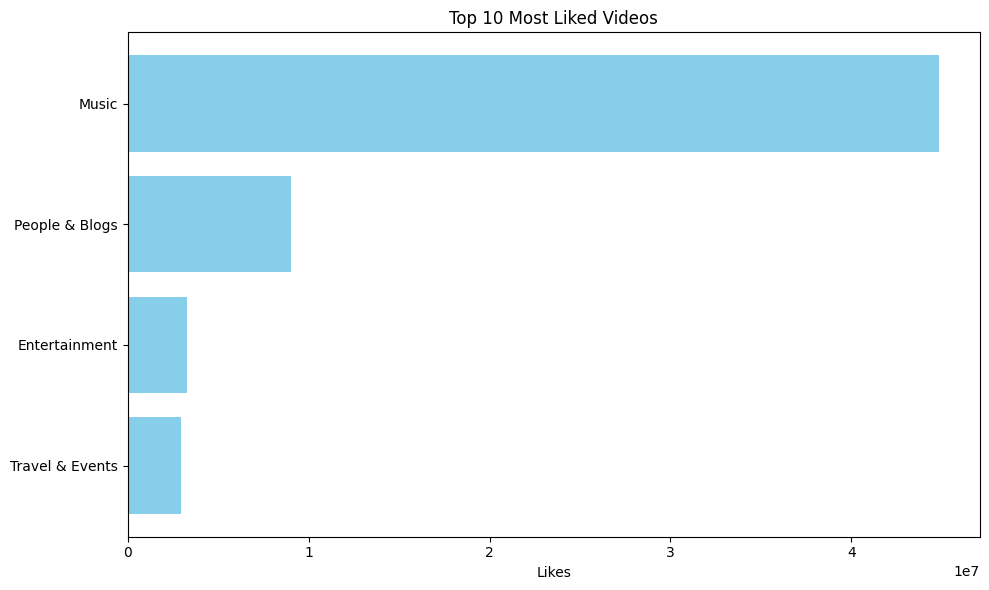

In [34]:
data['Likes'] = data['Likes'].astype(str).str.replace(',', '', regex=False)
data['Likes'] = pd.to_numeric(data['Likes'], errors='coerce')
top_liked = data[['Category', 'Likes']].dropna().sort_values(by='Likes', ascending=False).head(10)
plt.figure(figsize=(10, 6))
plt.barh(top_liked['Category'], top_liked['Likes'], color='skyblue')
plt.xlabel('Likes')
plt.title('Top 10 Most Liked Videos')
plt.gca().invert_yaxis()  
plt.tight_layout()
plt.show()

### 8) Which Categories Have The Highest Engagement Rate (Likes-To-Views Ratio), And How Does It Compare Across Categories Using A Bar Plot?

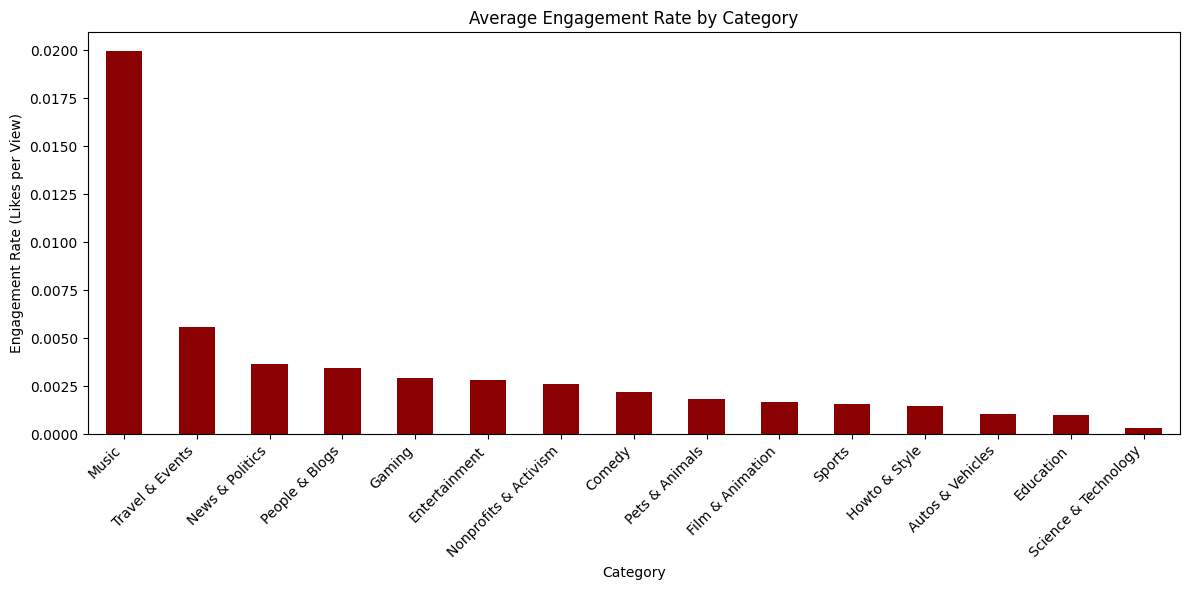

In [41]:
for col in ['Likes', 'Video views']:
    data[col] = data[col].astype(str).str.replace(',', '', regex=False)
    data[col] = pd.to_numeric(data[col], errors='coerce')
data['Engagement Rate'] = data['Likes'] / data['Video views']
category_engagement = data.groupby('Category')['Engagement Rate'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
category_engagement.plot(kind='bar', color='darkred')
plt.title('Average Engagement Rate by Category')
plt.ylabel('Engagement Rate (Likes per View)')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### 9) How Do Likes Very With Video Views Across Different Categories?

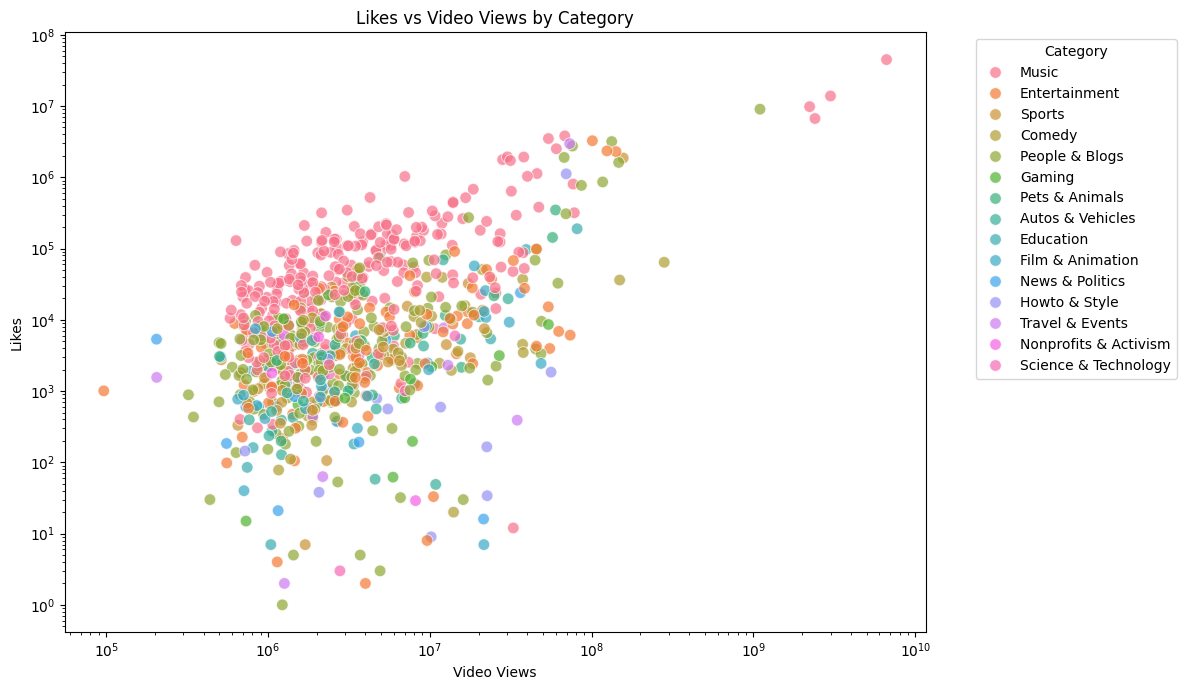

In [42]:
for col in ['Likes', 'Video views']:
    data[col] = data[col].astype(str).str.replace(',', '', regex=False)
    data[col] = pd.to_numeric(data[col], errors='coerce')
df_plot = data[['Likes', 'Video views', 'Category']].dropna()
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_plot, x='Video views', y='Likes', hue='Category', alpha=0.7, s=70)
plt.title('Likes vs Video Views by Category')
plt.xlabel('Video Views')
plt.ylabel('Likes')
plt.legend(title='Category', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xscale('log')  
plt.yscale('log')
plt.tight_layout()
plt.show()

### 10) Which YouTube vedio Categories Have The Highest Average Number Of Dislikes, And How Do They Compare Using A Bar Plot?

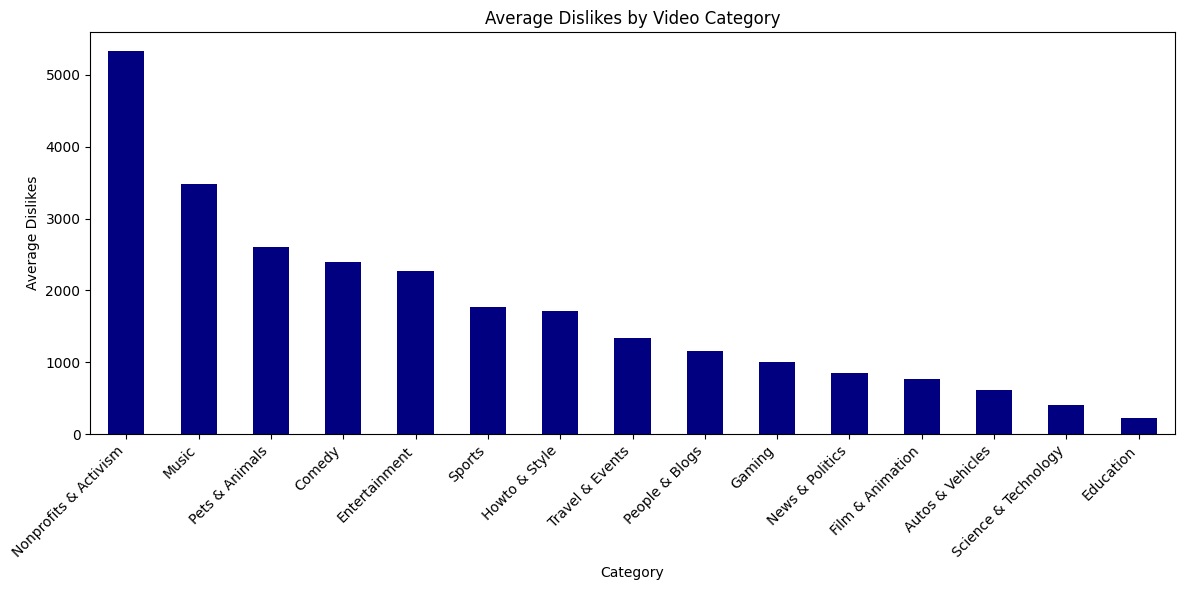

In [44]:
data['Dislikes'] = data['Dislikes'].astype(str).str.replace(',', '', regex=False)
data['Dislikes'] = pd.to_numeric(data['Dislikes'], errors='coerce')
avg_dislikes = data.groupby('Category')['Dislikes'].mean().sort_values(ascending=False)
plt.figure(figsize=(12, 6))
avg_dislikes.plot(kind='bar', color='navy')
plt.title('Average Dislikes by Video Category')
plt.ylabel('Average Dislikes')
plt.xlabel('Category')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()